<a href="https://colab.research.google.com/github/alanfm/wec/blob/main/%5BPPGEEC_ICA%5D_Wave_Energy_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Graduate Program in Electrical and Computer Engineering**
#### Federal University of Ceará - Sobral Campus
##### Researcher 1: Marcelo Estevão da Silva - Registration: 561821
##### Researcher 2: Raimundo Alan Freire Moreira - Resgistration: 559987

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#### Data Aquisition

In [4]:
# impoting the dataset

dataset = pd.read_csv("https://raw.githubusercontent.com/alanfm/wec/main/WEC_Perth_49.csv")
dataset.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77


In [5]:
dataset.shape

(36043, 149)

In [6]:
# datset lines and columns

print(f'Lines: {dataset.shape[0]}')
print(f'Columns: {dataset.shape[1]}')

Lines: 36043
Columns: 149


In [7]:
# defining the X data

X = dataset.iloc[:,0:98]
X.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,400.0,800.0,346.16,837.50,289.79,874.88,232.47,912.05,0.0,1010.0
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,400.0,800.0,346.16,837.50,289.79,874.88,232.47,912.05,0.0,1010.0
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,400.0,800.0,346.16,837.50,289.79,874.88,232.47,912.05,0.0,1010.0
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,400.0,800.0,346.16,837.50,289.79,874.88,232.47,912.05,0.0,1010.0
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,800.0,800.0,746.17,837.53,689.76,874.93,632.40,912.18,0.0,1010.0


In [8]:
# defining the y data

y = dataset.iloc[:,-1]
y.head()

0    4102461.43
1    4103361.41
2    4103680.44
3    4105661.06
4    3752648.77
Name: Total_Power, dtype: float64

In [9]:
# dataframe to array
X = X.values
y = y.values


# Normalization
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

# division into train and teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f'Treinamento: {X_train.shape[0]}  ---  {(X_train.shape[0]/X.shape[0])*100:.2f}%')
print(f'Teste: {X_test.shape[0]}  ---  {(X_test.shape[0]/X.shape[0])*100:.2f}%')

Treinamento: 25230  ---  70.00%
Teste: 10813  ---  30.00%


### **Multilayer Perceptron - MLP**

In [10]:
# Funções para teste
functions = ['sigmoid','tanh','linear','relu']

# Metricas avaliadas
mse_values_mlp = {functions[i]: [] for i in range(0, len(functions))}
mse_mlp = {functions[i]: [] for i in range(0, len(functions))}
rmse_mlp = {functions[i]: [] for i in range(0, len(functions))}
mae_mlp = {functions[i]: [] for i in range(0, len(functions))}
r2_mlp = {functions[i]: [] for i in range(0, len(functions))}
time_mlp = {functions[i]: [] for i in range(0, len(functions))}

# verificar 10 vezes e pegar melhor e a media (desvio padrão)
for i in functions:
  for _ in range(10):
      start_time_mlp = time.time()

      # defining the model
      model = tf.keras.Sequential([
          tf.keras.layers.Dense(units=50, activation=i), # hidden layer
          tf.keras.layers.Dense(units=1, activation=i) # output layer
      ])

      # hyperparameters
      learning_rate = 0.01
      optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
      loss_function = 'mean_squared_error'
      model.compile(optimizer=optimizer,
                  loss=loss_function)

      # training
      num_epochs = 50
      batch_size = 32
      history = model.fit(X_train,
                          y_train,
                          epochs=num_epochs,
                          batch_size=None,
                          verbose=0)

      end_time_mlp = time.time()



      # predictions
      y_pred = model.predict(X_test)

      # evaluation
      mse_mlp[i].append(mean_squared_error(y_test, y_pred))
      rmse_mlp[i].append(np.sqrt(mean_squared_error(y_test, y_pred)))
      mae_mlp[i].append(mean_absolute_error(y_test, y_pred))
      r2_mlp[i].append(r2_score(y_test, y_pred))


      # getting MSE value for each epoch
      mse_values_mlp[i].append(history.history['loss'])

      # Run time
      execution_time_mlp = end_time_mlp - start_time_mlp
      time_mlp[i].append(execution_time_mlp)

338/338 [==============================] - 1s 1ms/step


In [10]:
import os

os.makedirs('results/mlp/func', exist_ok=True)

mse_values_mlp_data = pd.DataFrame.from_dict(mse_mlp)
mse_values_mlp_data.head()
mse_values_mlp_data.to_csv('results/mlp/func/mse_values.csv')

mse_mlp_data = pd.DataFrame.from_dict(mse_mlp)
mse_mlp_data.head()
mse_mlp_data.to_csv('results/mlp/func/mse.csv')

rmse_mlp_data = pd.DataFrame.from_dict(rmse_mlp)
rmse_mlp_data.head()
rmse_mlp_data.to_csv('results/mlp/func/rmse.csv')

mae_mlp_data = pd.DataFrame.from_dict(mae_mlp)
mae_mlp_data.head()
mae_mlp_data.to_csv('results/mlp/func/mae.csv')

r2_mlp_data = pd.DataFrame.from_dict(r2_mlp)
r2_mlp_data.head()
r2_mlp_data.to_csv('results/mlp/func/r2.csv')

time_mlp_data = pd.DataFrame.from_dict(time_mlp)
time_mlp_data.head()
time_mlp_data.to_csv('results/mlp/func/time.csv')

NameError: ignored

In [12]:
for u in functions:
    print(f'Menor MSE: {min(mse_mlp[u])} função ({u})')
print("============================================================")
for u in functions:
    print(f'Menor RMSE: {min(rmse_mlp[u])} função ({u})')
print("============================================================")
for u in functions:
    print(f'Menor MAE: {min(mae_mlp[u])} função ({u})')
print("============================================================")
for u in functions:
    print(f'Maior R²: {max(r2_mlp[u])} função ({u})')
print("============================================================")
for u in functions:
    print(f'Time: {min(time_mlp[u])} função ({u})')

Menor MSE: 0.5843853580331472 função (sigmoid)
Menor MSE: 0.13968902959076218 função (tanh)
Menor MSE: 0.1687761571987919 função (linear)
Menor MSE: 0.5414801035538888 função (relu)
Menor RMSE: 0.7644510174191327 função (sigmoid)
Menor RMSE: 0.3737499559742612 função (tanh)
Menor RMSE: 0.41082375442370894 função (linear)
Menor RMSE: 0.7358533166018135 função (relu)
Menor MAE: 0.547865287597494 função (sigmoid)
Menor MAE: 0.2318885904606692 função (tanh)
Menor MAE: 0.29831210990018087 função (linear)
Menor MAE: 0.4622323911867945 função (relu)
Maior R²: 0.4208506721227715 função (sigmoid)
Maior R²: 0.8615625691382853 função (tanh)
Maior R²: 0.8327360590751874 função (linear)
Maior R²: 0.46337150012177575 função (relu)
Time: 59.69648265838623 função (sigmoid)
Time: 59.465882301330566 função (tanh)
Time: 60.39824676513672 função (linear)
Time: 59.31962323188782 função (relu)


In [13]:
# Pegar menor valor e definir qual foi a melhor função

tmp_1 = [min(valores) for valores in mse_values_mlp.values()]
tmp_2 = [min(valores) for valores in tmp_1]

print(f'Melhor função: {functions[tmp_2.index(min(tmp_2))]} com valor do MSE: {min(tmp_2)}')

Melhor função: tanh com valor do MSE: 0.12745188176631927


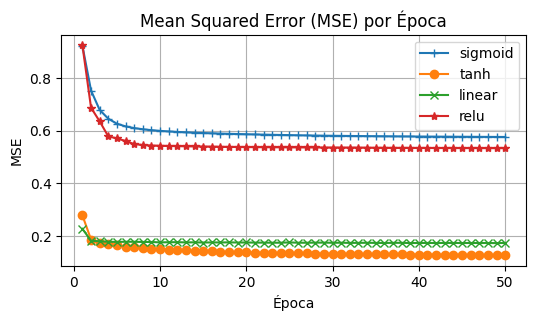

In [14]:
# getting MSE value for each epoch
plt.figure(figsize=(6, 3))

x = range(1, len(mse_values_mlp['sigmoid'][0]) + 1)

y1 = mse_values_mlp['sigmoid'][0]
y2 = mse_values_mlp['tanh'][0]
y3 = mse_values_mlp['linear'][0]
y4 = mse_values_mlp['relu'][0]


plt.plot(x, y1, label='sigmoid', marker='+')
plt.plot(x, y2, label='tanh', marker='o')
plt.plot(x, y3, label='linear', marker='x')
plt.plot(x, y4, label='relu', marker='*')


plt.legend(loc='upper right')

plt.xlabel('Época')
plt.ylabel('MSE')

plt.title('Mean Squared Error (MSE) por Época')
plt.grid(True)
plt.show()

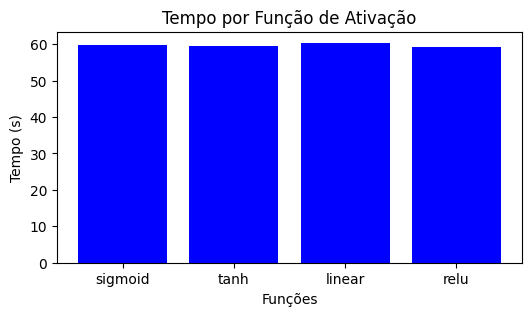

In [15]:
plt.figure(figsize=(6, 3))

time_mlp_min = [min(values) for values in time_mlp.values()]

plt.bar(functions, time_mlp_min, color='blue')

plt.xlabel('Funções')
plt.ylabel('Tempo (s)')
plt.title('Tempo por Função de Ativação')
#plt.ylim(75, 150)

plt.show()

In [47]:
time_mlp_min

[87.61147546768188, 87.54948949813843, 142.25566339492798, 89.43148446083069]

In [41]:
# Funções para teste

neuronios = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Metricas avaliadas
mse_values_mlp_n = {neuronios[i]: [] for i in range(0, len(neuronios))}
mse_mlp_n = {neuronios[i]: [] for i in range(0, len(neuronios))}
rmse_mlp_n = {neuronios[i]: [] for i in range(0, len(neuronios))}
mae_mlp_n = {neuronios[i]: [] for i in range(0, len(neuronios))}
r2_mlp_n = {neuronios[i]: [] for i in range(0, len(neuronios))}
time_mlp_n = {neuronios[i]: [] for i in range(0, len(neuronios))}

count = 1

for i in neuronios:
  for j in range(10):
    print(count)
    count += 1
    # defining the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=i, activation=functions[tmp_2.index(min(tmp_2))]), # hidden layer
        tf.keras.layers.Dense(units=1, activation=functions[tmp_2.index(min(tmp_2))]) # output layer
    ])

    # hyperparameters
    learning_rate = 0.01
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    loss_function = 'mean_squared_error'
    model.compile(optimizer=optimizer,
                loss=loss_function)

    # training
    num_epochs = 50
    batch_size = 32
    history = model.fit(X_train,
                        y_train,
                        epochs=num_epochs,
                        batch_size=None,
                        verbose=0)

    end_time_mlp = time.time()



    # predictions
    y_pred = model.predict(X_test)

    # evaluation
    mse_mlp_n[i].append(mean_squared_error(y_test, y_pred))
    rmse_mlp_n[i].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_mlp_n[i].append(mean_absolute_error(y_test, y_pred))
    r2_mlp_n[i].append(r2_score(y_test, y_pred))


    # getting MSE value for each epoch
    mse_values_mlp_n[i].append(history.history['loss'])

    # Run time
    execution_time_mlp = end_time_mlp - start_time_mlp
    time_mlp_n[i].append(execution_time_mlp)

1
338/338 [==============================] - 1s 1ms/step
2
338/338 [==============================] - 1s 2ms/step
3
338/338 [==============================] - 1s 2ms/step
4
338/338 [==============================] - 1s 2ms/step
5
338/338 [==============================] - 1s 1ms/step
6
338/338 [==============================] - 1s 1ms/step
7
338/338 [==============================] - 1s 1ms/step
8
338/338 [==============================] - 1s 1ms/step
9
338/338 [==============================] - 1s 1ms/step
10
338/338 [==============================] - 1s 1ms/step
11
338/338 [==============================] - 1s 1ms/step
12
338/338 [==============================] - 1s 1ms/step
13
338/338 [==============================] - 1s 2ms/step
14
338/338 [==============================] - 1s 2ms/step
15
338/338 [==============================] - 1s 2ms/step
16
338/338 [==============================] - 1s 1ms/step
17
338/338 [==============================] - 1s 1ms/step
18
338/338 [===========

In [2]:
os.makedirs('results/mlp/neurons', exist_ok=True)

mse_values_mlp_data_n = pd.DataFrame.from_dict(mse_values_mlp_n)
mse_values_mlp_data_n.head()
mse_values_mlp_data_n.to_csv('results/mlp/neurons/mse_values.csv')

mse_mlp_data_n = pd.DataFrame.from_dict(mse_mlp_n)
mse_mlp_data_n.head()
mse_mlp_data_n.to_csv('results/mlp/neurons/mse.csv')

rmse_mlp_data_n = pd.DataFrame.from_dict(rmse_mlp_n)
rmse_mlp_data_n.head()
rmse_mlp_data_n.to_csv('results/mlp/neurons/rmse.csv')

mae_mlp_data_n = pd.DataFrame.from_dict(mae_mlp_n)
mae_mlp_data_n.head()
mae_mlp_data_n.to_csv('results/mlp/neurons/mae.csv')

r2_mlp_data_n = pd.DataFrame.from_dict(r2_mlp_n)
r2_mlp_data_n.head()
r2_mlp_data_n.to_csv('results/mlp/neurons/r2.csv')

time_mlp_data_n = pd.DataFrame.from_dict(time_mlp_n)
time_mlp_data_n.head()
time_mlp_data_n.to_csv('results/mlp/neurons/time.csv')

NameError: ignored

In [1]:
for u in neuronios:
    print(f'Maior MSE Values: {min([min(v) for v in mse_values_mlp_n[u]])} função ({u})')
print("============================================================")
for u in neuronios:
    print(f'Menor MSE: {min(mse_mlp_n[u])} função ({u})')
print("============================================================")
for u in neuronios:
    print(f'Menor RMSE: {min(rmse_mlp_n[u])} função ({u})')
print("============================================================")
for u in neuronios:
    print(f'Menor MAE: {min(mae_mlp_n[u])} função ({u})')
print("============================================================")
for u in neuronios:
    print(f'Maior R²: {max(r2_mlp_n[u])} função ({u})')
print("============================================================")
for u in neuronios:
    print(f'Time: {min(time_mlp_n[u])} função ({u})')

NameError: ignored

In [32]:
# Pegar menor valor e definir qual foi a melhor topologia

tmp_1_n = [min(valores) for valores in mse_values_mlp_n.values()]
tmp_2_n = [min(valores) for valores in tmp_1_n]

print(f'Melhor topologia: {neuronios[tmp_2_n.index(min(tmp_2_n))]} com valor do MSE: {min(tmp_2_n)}')

Melhor topologia: 90 com valor do MSE: 0.12331779301166534


In [38]:
print(len(mse_values_mlp_n[10][0]))

50


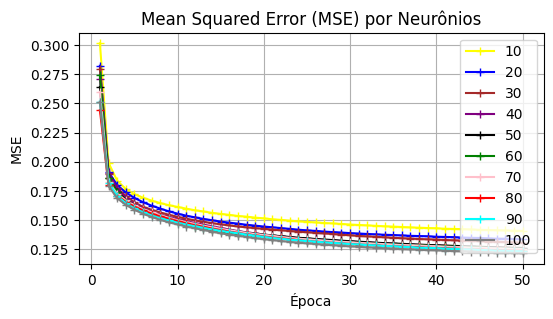

In [40]:
# getting MSE value for each epoch
plt.figure(figsize=(6, 3))

x = range(1, len(mse_values_mlp_n[10][1]) + 1)

y1 = mse_values_mlp_n[10][1]
y2 = mse_values_mlp_n[20][1]
y3 = mse_values_mlp_n[30][1]
y4 = mse_values_mlp_n[40][1]
y5 = mse_values_mlp_n[50][1]
y6 = mse_values_mlp_n[60][1]
y7 = mse_values_mlp_n[70][1]
y8 = mse_values_mlp_n[80][1]
y9 = mse_values_mlp_n[90][1]
y10 = mse_values_mlp_n[100][1]


plt.plot(x, y1, label='10', marker='+', color='yellow')
plt.plot(x, y2, label='20', marker='+', color='blue')
plt.plot(x, y3, label='30', marker='+', color='brown')
plt.plot(x, y4, label='40', marker='+', color='purple')
plt.plot(x, y5, label='50', marker='+', color='black')
plt.plot(x, y6, label='60', marker='+', color='green')
plt.plot(x, y7, label='70', marker='+', color='pink')
plt.plot(x, y8, label='80', marker='+', color='red')
plt.plot(x, y9, label='90', marker='+', color='cyan')
plt.plot(x, y10, label='100', marker='+', color='gray')


plt.legend()

plt.xlabel('Época')
plt.ylabel('MSE')



plt.title('Mean Squared Error (MSE) por Neurônios')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(6, 3))

time_mlp_min_n = [min(values) for values in time_mlp.values()]

plt.bar(neuronios, time_mlp_min_n, color='blue')

plt.xlabel('Funções')
plt.ylabel('Tempo (s)')
plt.title('Tempo por Função de Ativação')
# plt.ylim(75, 150)

plt.show()

### **Radial Base Function - RBF**

In [ ]:
from tensorflow.keras import backend as K

#
class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        # print(input_shape)
        # print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [ ]:
# hyperparameters
gamma = [1, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005]
units = [1.3, 1.2, 1.1, 1, 0.9, 0.8, 0.7]

# evaluation metrics
mse_values_rbf = {units[i]: [] for i in range(0, len(units))}
mse_rbf = {units[i]: [] for i in range(0, len(units))}
rmse_rbf = {units[i]: [] for i in range(0, len(units))}
mae_rbf = {units[i]: [] for i in range(0, len(units))}
r2_rbf = {units[i]: [] for i in range(0, len(units))}

In [ ]:
# hyperparameters
gamma = [1, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005]
units = [1.3, 1.2, 1.1, 1, 0.9, 0.8, 0.7]

# evaluation metrics
mse_values_rbf = {units[i]: [] for i in range(0, len(units))}
mse_rbf = {units[i]: [] for i in range(0, len(units))}
rmse_rbf = {units[i]: [] for i in range(0, len(units))}
mae_rbf = {units[i]: [] for i in range(0, len(units))}
r2_rbf = {units[i]: [] for i in range(0, len(units))}
time_rbf = {units[i]: [] for i in range(0, len(units))}

for u in units:
  for g in gamma:
    # defining the model
    modelRBF = tf.keras.Sequential()
    modelRBF.add(tf.keras.Input(shape=(X_test.shape[1],)))
    modelRBF.add(RBFLayer(round(X_test.shape[1] * u), g))
    modelRBF.add(tf.keras.layers.Dense(units=1, activation='linear'))

    modelRBF.compile(
        loss='mean_squared_error'
    )

    # start of training time
    start_time_rbf = time.time()

    # training
    num_epochs = 50
    batch_size = 32
    historyRBF = modelRBF.fit(X_train,
                        y_train,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        verbose=0)
    # end of training time
    end_time_rbf = time.time()

    # predictions
    y_pred = modelRBF.predict(X_test)

    mse_rbf_tmp = mean_squared_error(y_test, y_pred)
    mse_rbf[u].append(mse_rbf_tmp)
    rmse_rbf[u].append(np.sqrt(mse_rbf_tmp))
    mae_rbf[u].append(mean_absolute_error(y_test, y_pred))
    r2_rbf[u].append(r2_score(y_test, y_pred))
    time_rbf[u].append(end_time_rbf - start_time_rbf)

    # getting MSE value for each epoch
    mse_values_rbf[u].append(historyRBF.history['loss'])


In [2]:
os.makedirs('results/rbf', exist_ok=True)

mse_values_rbf_data = pd.DataFrame.from_dict(mse_rbf)
mse_values_rbf_data.head()
mse_values_rbf_data.to_csv('results/rbf/mse_values.csv')

mse_rbf_data = pd.DataFrame.from_dict(mse_rbf)
mse_rbf_data.head()
mse_rbf_data.to_csv('results/rbf/mse.csv')

rmse_rbf_data = pd.DataFrame.from_dict(rmse_rbf)
rmse_rbf_data.head()
rmse_rbf_data.to_csv('results/rbf/rmse.csv')

mae_rbf_data = pd.DataFrame.from_dict(mae_rbf)
mae_rbf_data.head()
mae_rbf_data.to_csv('results/rbf/mae.csv')

r2_rbf_data = pd.DataFrame.from_dict(r2_rbf)
r2_rbf_data.head()
r2_rbf_data.to_csv('results/rbf/r2.csv')

time_rbf_data = pd.DataFrame.from_dict(time_rbf)
time_rbf_data.head()
time_rbf_data.to_csv('results/rbf/time.csv')


# for u in units:
#   for g_key, g_value in enumerate(gamma):
#     print(f'MSE: {mse_rbf[u][g_key]} com {g_value} gamma e {round(X_test.shape[1] * u)} neurônios')
# print("============================================================")
# for u in units:
#   for g_key, g_value in enumerate(gamma):
#     print(f'RMSE: {rmse_rbf[u][g_key]} com {g_value} gamma e {round(X_test.shape[1] * u)} neurônios')
# print("============================================================")
# for u in units:
#   for g_key, g_value in enumerate(gamma):
#     print(f'MAE: {mae_rbf[u][g_key]} com {g_value} gamma e {round(X_test.shape[1] * u)} neurônios')
# print("============================================================")
# for u in units:
#   for g_key, g_value in enumerate(gamma):
#     print(f'R²: {r2_rbf[u][g_key]} com {g_value} gamma e {round(X_test.shape[1] * u)} neurônios')
# print("============================================================")
# for u in units:
#   for g_key, g_value in enumerate(gamma):
#     print(f'Time: {time_rbf[u][g_key]} com {g_value} gamma e {round(X_test.shape[1] * u)} neurônios')

NameError: ignored

In [52]:
for u in units:
    print(f'Menor MSE: {min(mse_rbf[u])} {round(X_test.shape[1] * u)} neurônios')
print("============================================================")
for u in units:
    print(f'Menor RMSE: {min(rmse_rbf[u])} {round(X_test.shape[1] * u)} neurônios')
print("============================================================")
for u in units:
    print(f'Menor MAE: {min(mae_rbf[u])} {round(X_test.shape[1] * u)} neurônios')
print("============================================================")
for u in units:
    print(f'Maior R²: {max(rs_rbf[u])} {round(X_test.shape[1] * u)} neurônios')
print("============================================================")
for u in units:
    print(f'Time: {min(time_rbf[u])} {round(X_test.shape[1] * u)} neurônios')

ValueError: ignored

In [ ]:
# getting MSE value for each epoch
mse_values_RBF = historyRBF.history['loss']

# Plotting MSE for each epoch
plt.figure(figsize=(6, 3))
plt.plot(range(1, len(mse_values_RBF) + 1), mse_values_RBF, marker='+')
plt.title('Mean Squared Error (MSE) por Época')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

### **Comparassion**

In [ ]:
# plotting results

# Dados para o gráfico de barras
categorias = ['MLP', 'RBF']
valores = [mse, mseRBF]

plt.figure(figsize=(6, 3))
# Criar um gráfico de barras
plt.bar(categorias, valores, color='blue')

# Adicionar rótulos e título
plt.xlabel('Rede')
plt.ylabel('Valores')
plt.title('Resultados MSE')

# Exibir o gráfico
plt.show()

In [ ]:
# plotting results

# Dados para o gráfico de barras
categorias = ['MLP', 'RBF']
valores = [rmse, rmseRBF]

plt.figure(figsize=(6, 3))
# Criar um gráfico de barras
plt.bar(categorias, valores, color='blue')

# Adicionar rótulos e título
plt.xlabel('Rede')
plt.ylabel('Valores')
plt.title('Resultados RMSE')

# Exibir o gráfico
plt.show()

In [ ]:
# plotting results

# Dados para o gráfico de barras
categorias = ['MLP', 'RBF']
valores = [mae, maeRBF]

plt.figure(figsize=(6, 3))
# Criar um gráfico de barras
plt.bar(categorias, valores, color='blue')

# Adicionar rótulos e título
plt.xlabel('Rede')
plt.ylabel('Valores')
plt.title('Resultados MAE')

# Exibir o gráfico
plt.show()

In [ ]:
# plotting results

# Dados para o gráfico de barras
categorias = ['MLP', 'RBF']
valores = [r2, r2RBF]

plt.figure(figsize=(6, 3))
# Criar um gráfico de barras
plt.bar(categorias, valores, color='blue')

# Adicionar rótulos e título
plt.xlabel('Rede')
plt.ylabel('Valores')
plt.title('Resultados R²')
plt.ylim(0.95, 1.009)

# Exibir o gráfico
plt.show()

In [ ]:
# plotting results

# Dados para o gráfico de barras
categorias = ['MLP', 'RBF']
valores = [execution_time_mlp, execution_time_rbf]

plt.figure(figsize=(6, 3))
# Criar um gráfico de barras
plt.bar(categorias, valores, color='blue')

# Adicionar rótulos e título
plt.xlabel('Rede')
plt.ylabel('Tempo (s)')
plt.title('Tempo de Execução')
plt.ylim(90, 148)

# Exibir o gráfico
plt.show()